In [1]:
import os

from tqdm import tqdm

import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# plt.style.use('dark_background')

matplotlib.rcParams["figure.dpi"] = 100
matplotlib.rcParams['savefig.dpi'] = 600
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

from IPython.core.display import HTML
HTML("""
<style>
.jp-RenderedImage {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
def save_figure(fig, name):
    directory = 'reports'
    if not os.path.exists(directory):
        os.makedirs(directory)
    path = os.path.join(directory, f'{name}.pdf')
    fig.savefig(path, bbox_inches='tight')

In [5]:
def get_input(x):
    inputs = ("sunny", "rainy")
    return inputs[torch.argmax(x)]

def get_class(o):
    classes = ("pie", "burger", "chicken")
    if torch.max(o) == 0:
        return "nothing"
    return classes[torch.argmax(o)]

In [6]:
X_indices = torch.randint(0, 2, (1000,))
X = F.one_hot(X_indices, num_classes=2)
Y = torch.full((len(X), 3), float('nan'))
Y[0] = torch.tensor([1, 0, 0])
for i in range(1, len(X)):
    if torch.argmax(X[i]) == 0:
        Y[i] = Y[i-1]
    elif torch.argmax(X[i]) == 1:
        a = (torch.argmax(Y[i-1]) + 1) % 3
        Y[i] = F.one_hot(a, num_classes=3)

X = X.type(torch.float32)
Y = Y.type(torch.float32)
X.shape, Y.shape

(torch.Size([1000, 2]), torch.Size([1000, 3]))

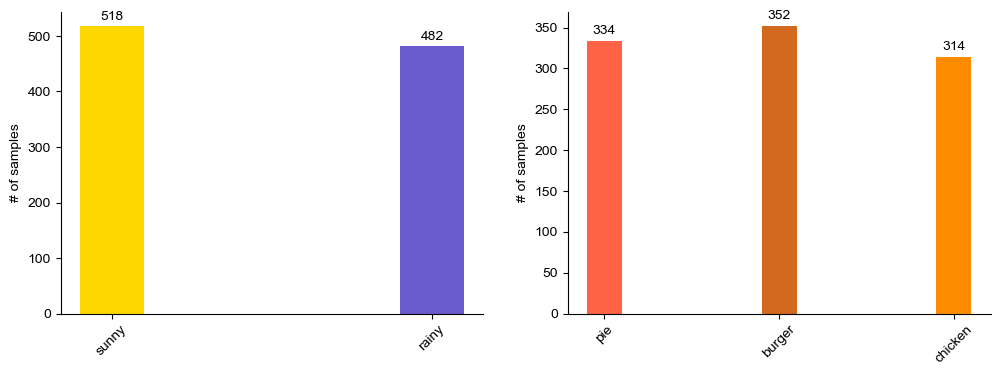

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# 1
ax = axs[0]
X_argmax = torch.argmax(X, dim=1)
y_values, counts = np.unique(X_argmax, return_counts=True)
inputs = ("sunny", "rainy")
ax.bar(y_values[0], counts[0], width=0.2, color='gold')
ax.bar(y_values[1], counts[1], width=0.2, color='slateblue')
ax.set_xticks(y_values)
ax.set_xticklabels(inputs, rotation = 45)
# ax.set_title("Histogram of classes")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

rects = ax.patches
for rect, label in zip(rects, counts):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

ax.set_ylabel('# of samples')

# 2
ax = axs[1]
Y_argmax = torch.argmax(Y, dim=1)
y_values, counts = np.unique(Y_argmax, return_counts=True)
classes = ("pie", "burger", "chicken")
ax.bar(y_values[0], counts[0], width=0.2, color='tomato')
ax.bar(y_values[1], counts[1], width=0.2, color='chocolate')
ax.bar(y_values[2], counts[2], width=0.2, color='darkorange')
ax.set_xticks(y_values)
ax.set_xticklabels(classes, rotation = 45)
# ax.set_title("Histogram of classes")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

rects = ax.patches
for rect, label in zip(rects, counts):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

ax.set_ylabel('# of samples')

plt.show(fig)
save_figure(fig, name='weather_food-histogram')

In [8]:
# X = torch.tensor([
#     [1, 0],
#     [0, 1],
#     [0, 1],
#     [1, 0],
#     [0, 1],
# ], dtype=torch.float32)

# Y = torch.tensor([
#     [1, 0, 0],
#     [0, 1, 0],
#     [0, 0, 1],
#     [0, 0, 1],
#     [1, 0, 0],
# ], dtype=torch.float32)

In [9]:
X_val = torch.tensor([
    [1, 0],
    [0, 1],
    [0, 1],
    [1, 0],
    [0, 1],
    [0, 1],
    [1, 0],
    [1, 0],
    [1, 0],
    [0, 1],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [0, 1],
    [1, 0],
], dtype=torch.float32)

Y_val = torch.tensor([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
    [1, 0, 0],
    [1, 0, 0],
], dtype=torch.float32)

In [57]:
X_test = torch.tensor([
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
], dtype=torch.float32)

Y_test = torch.tensor([
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
], dtype=torch.float32)

In [58]:
X_test.shape, Y_test.shape

(torch.Size([5, 2]), torch.Size([5, 3]))

In [11]:
X_indices = torch.randint(0, 2, (100,))
X_test2 = F.one_hot(X_indices, num_classes=2)
Y_test2 = torch.full((len(X_test2), 3), float('nan'))
Y_test2[0] = torch.tensor([1, 0, 0])
for i in range(1, len(X_test2)):
    if torch.argmax(X_test2[i]) == 0:
        Y_test2[i] = Y_test2[i-1]
    elif torch.argmax(X_test2[i]) == 1:
        a = (torch.argmax(Y_test2[i-1]) + 1) % 3
        Y_test2[i] = F.one_hot(a, num_classes=3)

X_test2 = X_test2.type(torch.float32)
Y_test2 = Y_test2.type(torch.float32)
X_test2.shape, Y_test2.shape

(torch.Size([100, 2]), torch.Size([100, 3]))

In [86]:
X_test3 = torch.tensor([
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
], dtype=torch.float32)

Y_test3 = torch.tensor([
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
], dtype=torch.float32)

In [12]:
class LinearRNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRNN, self).__init__()
        
        self.output_size = output_size
        
        self.weather_layer = nn.Linear(input_size, output_size, bias=False)
        self.food_layer = nn.Linear(output_size, output_size, bias=False)
    
    def forward(self, weather, food):
        o1 = self.weather_layer(weather)
        o2 = self.food_layer(food)
        out = o1 + o2
        return out

In [13]:
class RNNWeather(nn.Module):
    def __init__(self, input_size, output_size):
        super(RNNWeather, self).__init__()
        
        self.output_size = output_size
        
        self.weather_layer = nn.Linear(input_size, input_size * output_size, bias=False)
        self.food_layer = nn.Linear(output_size, input_size * output_size, bias=False)
        self.output_layer = nn.Linear(input_size * output_size, output_size, bias=False)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, weather, food):
        o1 = self.weather_layer(weather)
        o2 = self.food_layer(food)
#         out = self.output_layer(o1 + o2)
        
        o_add = o1 + o2
        
        o_nonlinear = self.softmax(o_add)
#         print("o_nonlinear", o_nonlinear)
        
        out = torch.zeros_like(food)
        for i in range(len(o_nonlinear)):
            o_halves = torch.split(o_nonlinear[i], int(len(o_nonlinear[i])/2), dim=0)
            o_merge = torch.vstack(o_halves).T
            o_merge = torch.sum(o_merge, axis=1)
            out[i] = o_merge
#         print("out", out)
        del o1, o2, o_add, o_nonlinear, o_halves, o_merge
        return out

In [14]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers=1):
        super(RNN, self).__init__()

        self.input_size = input_size
        self.output_size = output_size
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

#         self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        self.rnn = nn.RNN(input_size, output_size, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x):
        batch_size = x.size(0)

#         hidden = self.init_hidden(batch_size)
        hidden = torch.zeros(self.n_layers, batch_size, self.output_size).to(device)
#         out, hidden = self.rnn(x, hidden)
        out, hidden = self.rnn(x, hidden)

#         out = out.contiguous().view(-1, self.hidden_dim)
#         out = self.fc(out)

        return out, hidden

    def init_hidden(self, batch_size):
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(device)
        return hidden

In [15]:
params = {
    'model': 'rnnweather',
    'lr': 1e-1,
    'loss': 'mse',
    'optimizer': 'sgd'
}

def get_exp_name(p):
    return f"{p['model']}-{p['optimizer']}-{p['loss']}-lr_{p['lr']}"

In [16]:
if params['model'] == 'linearrnn':
    rnn = LinearRNN(input_size=2, output_size=3).to(device)
elif params['model'] == 'rnnweather':
    rnn = RNNWeather(input_size=2, output_size=3).to(device)
elif params['model'] == 'rnn':
    rnn = RNN(input_size=1, output_size=3, hidden_dim=6, n_layers=1).to(device)

In [17]:
optimizer = torch.optim.SGD(rnn.parameters(), params['lr'])

In [18]:
if params['loss'] == 'mse':
    criterion = nn.MSELoss()
elif params['loss'] == 'ce':
    criterion = nn.CrossEntropyLoss()

In [19]:
print(list(rnn.parameters()))

[Parameter containing:
tensor([[-0.4231, -0.3599],
        [ 0.1840,  0.0381],
        [-0.1126,  0.6229],
        [ 0.0526, -0.3322],
        [ 0.4704, -0.0401],
        [ 0.6042, -0.3494]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([[-0.5501,  0.1563, -0.3079],
        [ 0.2675,  0.0475,  0.5740],
        [-0.2810, -0.3590,  0.3026],
        [-0.4536, -0.2978,  0.5072],
        [ 0.0343,  0.2830, -0.1265],
        [-0.3905,  0.5544, -0.1305]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([[ 0.2439,  0.3691,  0.3624,  0.3835,  0.1154,  0.2622],
        [-0.0876,  0.2896, -0.3066,  0.2956,  0.3782,  0.2056],
        [ 0.1230,  0.2622, -0.3097, -0.1563, -0.3218,  0.3834]],
       device='cuda:0', requires_grad=True)]


In [20]:
def predict(model, X, Y):
    O = torch.full((len(X), model.output_size), float('nan'))
    for i in range(len(X)):
        x = X[i:i+1].to(device)

        if i - 1 < 0:
            y_prev = torch.zeros((len(x), model.output_size), dtype=torch.float32, device=device)
        else:
            y_prev = Y[i-1:i].to(device)
#             y_prev = o.clone().detach()

        O[i] = o = rnn(x, y_prev)
    O_argmax = torch.argmax(O, axis=1)
    return O, O_argmax

In [21]:
history = {}

In [22]:
losses = []
val_losses = []

In [23]:
O = torch.full_like(Y, float('nan')).to(device)

X = X.to(device)
Y = Y.to(device)
for epoch in tqdm(range(400)):
    epoch_loss = 0
    for i in range(0, len(X)):
        rnn.train()
        x = X[i:i+1]#.to(device)
        y = Y[i:i+1]#.to(device)

        if i - 1 < 0:
            y_prev = torch.zeros_like(y, dtype=torch.float32).to(device)
        else:
#             y_prev = o.clone().detach()
            y_prev = Y[i-1:i].to(device)

        optimizer.zero_grad()
        O[i] = o = rnn(x, y_prev)
        loss = criterion(o, y)
        loss.backward()
        optimizer.step()
        epoch_loss += float(loss)
    losses.append(epoch_loss / len(X))
    
    del y_prev, o, epoch_loss
    
    Y_val_pred, _ = predict(rnn, X_val, Y_val)
    val_loss = criterion(Y_val_pred.to(device), Y_val.to(device))
    val_losses.append(float(val_loss))
    
    Y_pred = torch.argmax(O, axis=1)
    Y_true = torch.argmax(Y, axis=1)
    if torch.all(Y_pred == Y_true):
        print(f'END @ epoch {epoch}')
        break
print(list(rnn.parameters()))
print("-" * 30)

del Y_pred, Y_true

history[get_exp_name(params)] = {
    'train': losses,
    'val': val_losses
}

  4%|██▎                                                            | 15/400 [00:14<06:13,  1.03it/s]

END @ epoch 15
[Parameter containing:
tensor([[ 1.8170, -1.4753],
        [-2.6968,  1.8915],
        [-1.3619,  1.8155],
        [-1.2576,  1.8849],
        [ 2.1523, -2.4682],
        [ 2.1225, -2.0692]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([[ 2.2931, -0.9620, -0.9331],
        [ 2.9307, -1.6425, -1.3087],
        [-1.5693,  2.5630, -1.2863],
        [-0.6943, -1.5779,  2.7240],
        [-2.2564,  3.0189, -1.3111],
        [-2.0772, -1.0152,  2.9343]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([[ 0.2439,  0.3691,  0.3624,  0.3835,  0.1154,  0.2622],
        [-0.0876,  0.2896, -0.3066,  0.2956,  0.3782,  0.2056],
        [ 0.1230,  0.2622, -0.3097, -0.1563, -0.3218,  0.3834]],
       device='cuda:0', requires_grad=True)]
------------------------------


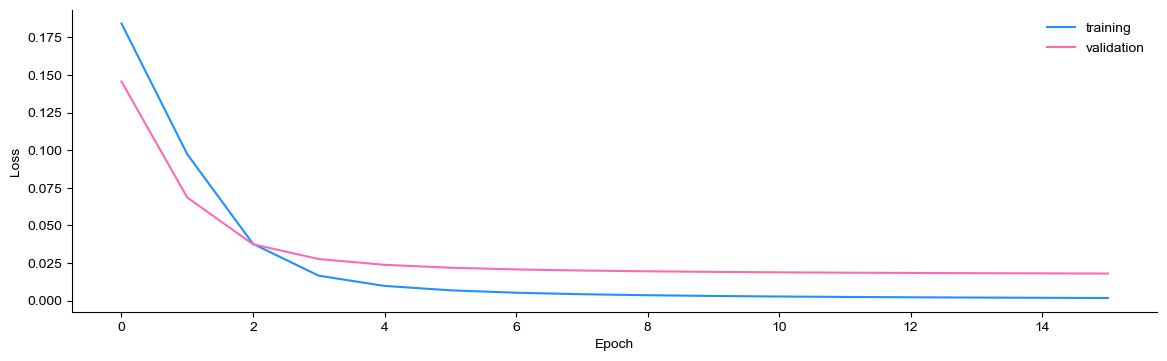

In [67]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(losses, '-', markersize=3, label='training', color='dodgerblue')
ax.plot(val_losses, '-', markersize=3, label='validation', color='hotpink')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

for direction in ('top', 'right'):
    ax.spines[direction].set_visible(False)
ax.legend(frameon=False)
save_figure(fig, name='fit-weather-learning_curves')

In [25]:
print(list(rnn.parameters()))

[Parameter containing:
tensor([[ 1.8170, -1.4753],
        [-2.6968,  1.8915],
        [-1.3619,  1.8155],
        [-1.2576,  1.8849],
        [ 2.1523, -2.4682],
        [ 2.1225, -2.0692]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([[ 2.2931, -0.9620, -0.9331],
        [ 2.9307, -1.6425, -1.3087],
        [-1.5693,  2.5630, -1.2863],
        [-0.6943, -1.5779,  2.7240],
        [-2.2564,  3.0189, -1.3111],
        [-2.0772, -1.0152,  2.9343]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([[ 0.2439,  0.3691,  0.3624,  0.3835,  0.1154,  0.2622],
        [-0.0876,  0.2896, -0.3066,  0.2956,  0.3782,  0.2056],
        [ 0.1230,  0.2622, -0.3097, -0.1563, -0.3218,  0.3834]],
       device='cuda:0', requires_grad=True)]


In [85]:
def visualize_weather(X, Y, O):
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    fig, ax = plt.subplots(figsize=(12, 4), nrows=2, gridspec_kw={ 'height_ratios': [3, 1]})

    ax[0].plot(Y.cpu(), '-^', color='red', label="actual", alpha=0.4)
    ax[0].plot(O.cpu(), '-.s', color='blue', label="predicted", alpha=0.4)
    ax[0].set_xticks([])
#     ax[0].set_xticks(torch.arange(len(O)))
#     ax[0].set_xticks([0, len(O)-1])
    ax[0].set_ylabel('Food')
    foods = ['pie', 'burger', 'chicken']
    food_values = torch.arange(len(foods))
    ax[0].set_yticks(food_values)
    ax[0].set_yticklabels(foods)
    ax[0].legend(frameon=False)
    # ax[0].add_artist(
    #     AnnotationBbox(
    #         OffsetImage(food_images[0]),
    #         (1, 1),
    #         frameon=False,
    #     ) 
    # )

    ax[1].plot(torch.argmax(X, axis=1).cpu(), '-o', ms=3.5, color='black')
    ax[1].set_xticks(torch.arange(len(X)))
#     ax[1].set_xticks([0, len(X)-1])
    ax[1].set_xlabel('Time step')
    ax[1].set_ylabel('Weather')
    weathers = ['sunny', 'rainy']
    weather_values = torch.arange(len(weathers))
    ax[1].set_yticks(weather_values)
    ax[1].set_yticklabels(weathers)
    ax[1].set_ylim(-0.15, 1.15)
    ax[1].legend(frameon=False)

    return fig

No handles with labels found to put in legend.


pred tensor([1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])
true tensor([0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])


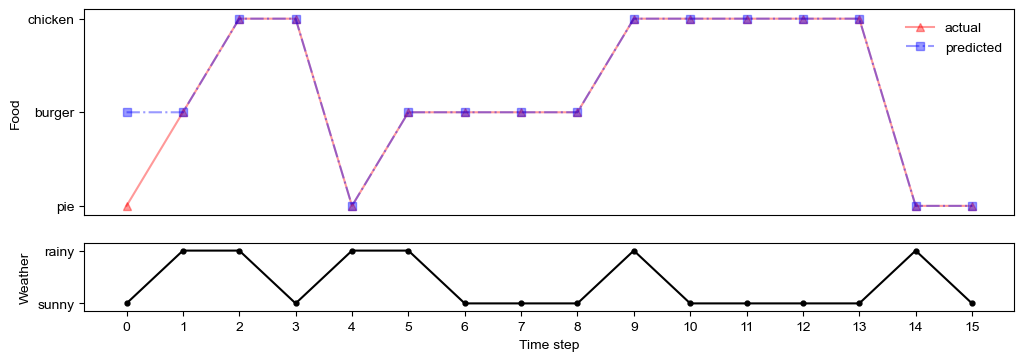

In [72]:
Y_val_pred, Y_val_argmax = predict(rnn, X_val, Y_val)
print('pred', Y_val_argmax)
print('true', torch.argmax(Y_val, dim=1).cpu())
fig = visualize_weather(X_val, torch.argmax(Y_val, dim=1), Y_val_argmax)
save_figure(fig, name='fit-weather-validation')

No handles with labels found to put in legend.


pred tensor([1, 2, 2, 2, 2])
true tensor([2, 2, 2, 2, 2])


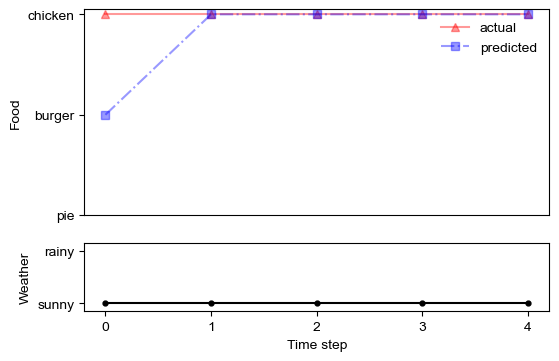

In [84]:
Y_test_pred, Y_test_argmax = predict(rnn, X_test, Y_test)
print('pred', Y_test_argmax)
print('true', torch.argmax(Y_test, dim=1).cpu())
fig = visualize_weather(X_test, torch.argmax(Y_test, dim=1), Y_test_argmax)
save_figure(fig, name='fit-weather-test')

No handles with labels found to put in legend.


pred tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0])
true tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0])


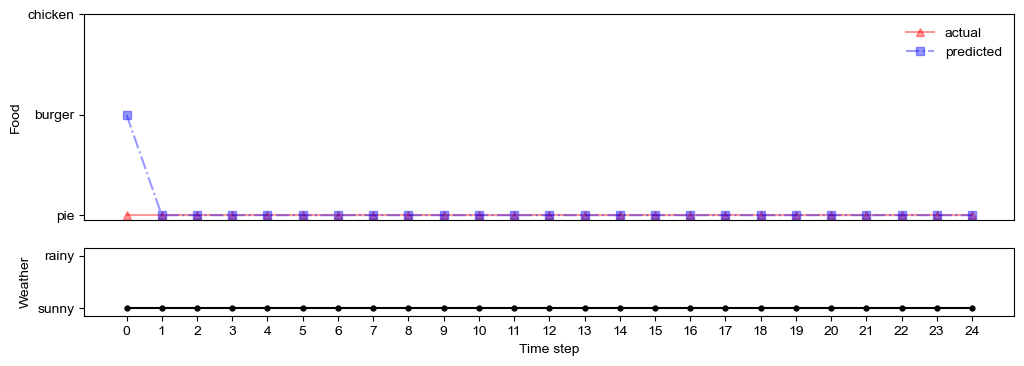

In [87]:
Y_test3_pred, Y_test3_argmax = predict(rnn, X_test3, Y_test3)
print('pred', Y_test3_argmax)
print('true', torch.argmax(Y_test3, dim=1).cpu())
fig = visualize_weather(X_test3, torch.argmax(Y_test3, dim=1), Y_test3_argmax)
save_figure(fig, name='fit-weather-test3')

No handles with labels found to put in legend.


pred tensor([0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2,
        0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 2,
        0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1,
        2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 2,
        2, 0, 1, 2])
true tensor([0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2,
        0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 2,
        0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1,
        2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 2,
        2, 0, 1, 2])
tensor(1.)


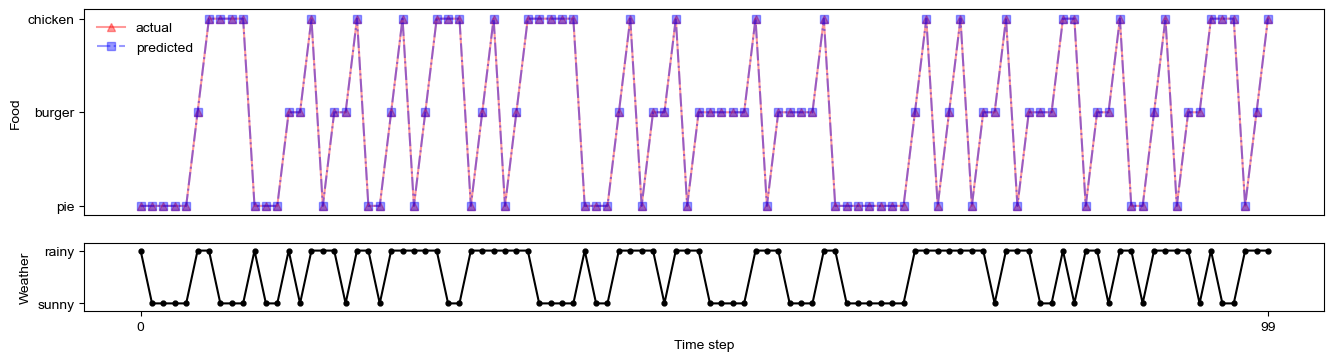

In [79]:
Y_test2_pred, Y_test2_argmax = predict(rnn, X_test2, Y_test2)
print('pred', Y_test2_argmax)
print('true', torch.argmax(Y_test2, dim=1).cpu())
print(torch.sum(Y_test2_argmax == torch.argmax(Y_test2, dim=1).cpu()) / len(Y_test2_argmax))
fig = visualize_weather(X_test2, torch.argmax(Y_test2, dim=1), Y_test2_argmax)
save_figure(fig, name='fit-weather-test100')

In [30]:
a = 0.1*torch.normal(0, 1, size=(10, 1))
a.shape

torch.Size([10, 1])

In [31]:
def create_regression_dataset(num):
    X = torch.linspace(-10, 10, steps=num)
    a = 0.1*X*torch.cos(X) + 0.1 * torch.normal(0, 1, size=X.shape)
    Y = 0.1*X*torch.cos(X) + 0.1*torch.normal(0, 1, size=X.shape)
    return X[:, None], Y[:, None]

In [32]:
X_train, Y_train = create_regression_dataset(num=900)
X_test, Y_test = create_regression_dataset(num=100)
N = X_train.shape[0]
C = 1
D = len(X_train[0])

In [33]:
X_train.shape, Y_train.shape

(torch.Size([900, 1]), torch.Size([900, 1]))

In [34]:
def plot_regression(X, Y):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    sample_color = "tab:cyan"
    cmap = 'cool'
    markers = ['o', 's']
    import matplotlib.colors as mcolors
    names = list(mcolors.TABLEAU_COLORS) + list(mcolors.BASE_COLORS) + ["deepskyblue", "crimson", "darkviolet", "orangered"]

    ax.scatter(X, Y, c=sample_color, marker='o', linewidth=1, edgecolor="black", label="$x$")
    
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    
#     ax.set_aspect(1)

#     ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=9)
    
    plt.tight_layout()
    return fig

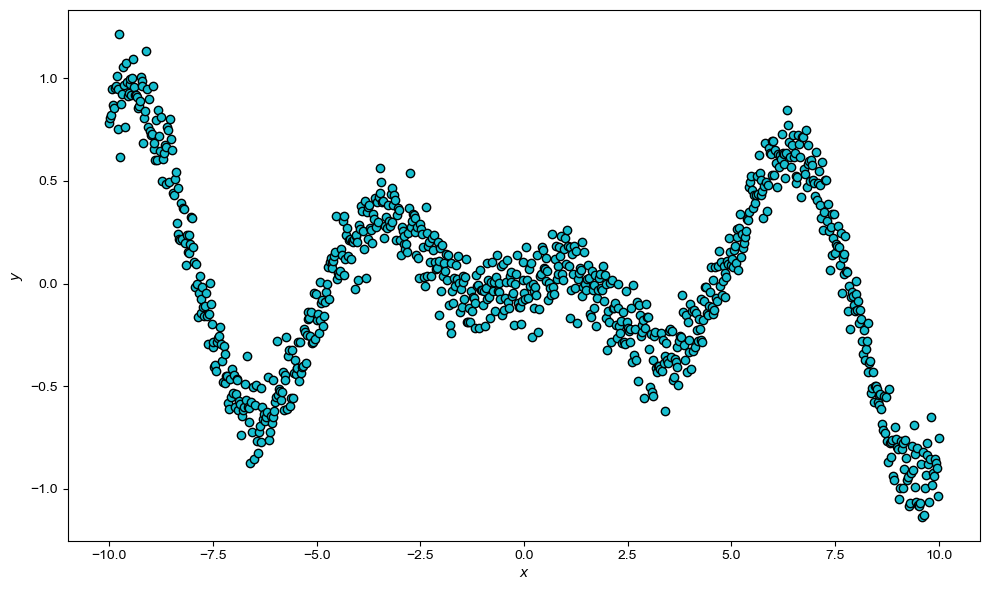

In [35]:
fig = plot_regression(X_train, Y_train)
# fig.savefig("regression-20_training_prototypes.png", dpi=600)

In [36]:
class RNNRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(RNNRegressor, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        
    def forward(self, x):
        h = torch.zeros(self.num_layers, len(x), self.hidden_size)
        y, h = self.rnn(x)
        return y, h

In [37]:
rnn_regressor = RNNRegressor(input_size=X_train.shape[1], hidden_size=10, num_layers=1)

In [38]:
# # X = X_train
# # Y = Y_train
# O = torch.full_like(Y, float('nan'))
# losses = []

# for epoch in range(1):
#     for i in range(len(X)):
#         x = X[i:i+1]
#         y = Y[i:i+1]

#         rnn_regressor.train()
#         optimizer.zero_grad()
#         o, h = rnn_regressor(x)
        
#         loss = criterion(o, y)
#         optimizer.step()
#         losses.append(loss.detach())
# print("-" * 30)

In [39]:
fig, ax = plt.subplots(figsize=)
ax.plot(losses)

SyntaxError: invalid syntax (<ipython-input-39-fed9c2ff4e03>, line 1)

In [ ]:
y = np.sin(np.linspace(0,100,1000)+2*np.pi*np.random.rand())
X = torch.autograd.Variable(torch.Tensor(y))[:100].view(-1,1,1)

In [ ]:
X.shape, y.shape